# Predict Employee Churn with Decision Trees and Random Forests

## 1. Inspecting Employee datafile



In [2]:
#!head -n5 ../input/employee_data.csv
with open("employee_data.csv") as myfile:
    head = [next(myfile) for x in range(6)]
print(head)    

['satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary\n', '0.38,0.53,2,157,3,0,1,0,sales,low\n', '0.8,0.86,5,262,6,0,1,0,sales,medium\n', '0.11,0.88,7,272,4,0,1,0,sales,medium\n', '0.72,0.87,5,223,5,0,1,0,sales,low\n', '0.37,0.52,2,159,3,0,1,0,sales,low\n']


## 2. Loading Employee's Data

In [3]:
from __future__ import print_function  
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling  #includes a method named as ProfileReport() which generate a basic report on the input DataFrame. 
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

## 3. Exploratory Data Analysis

In [5]:
employee = pd.read_csv("employee_data.csv")
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
employee.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
employee.shape

(14999, 10)

In [9]:
employee.profile_report(title = 'Data Report')

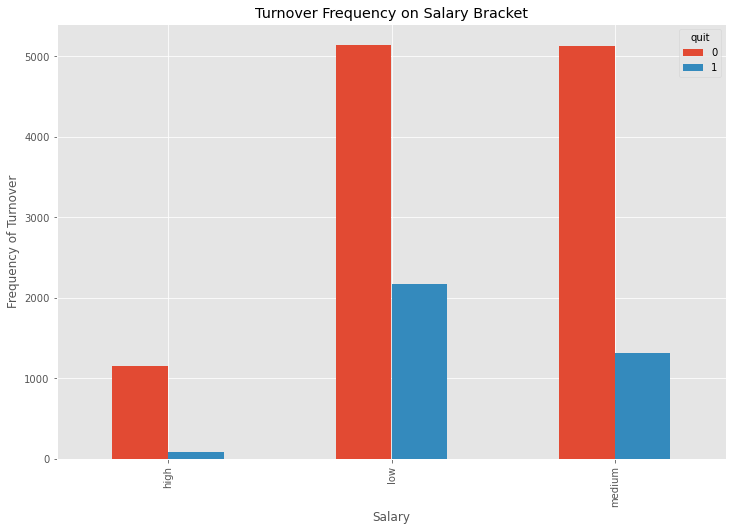

In [10]:
pd.crosstab(employee.salary, employee.quit).plot(kind = 'bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

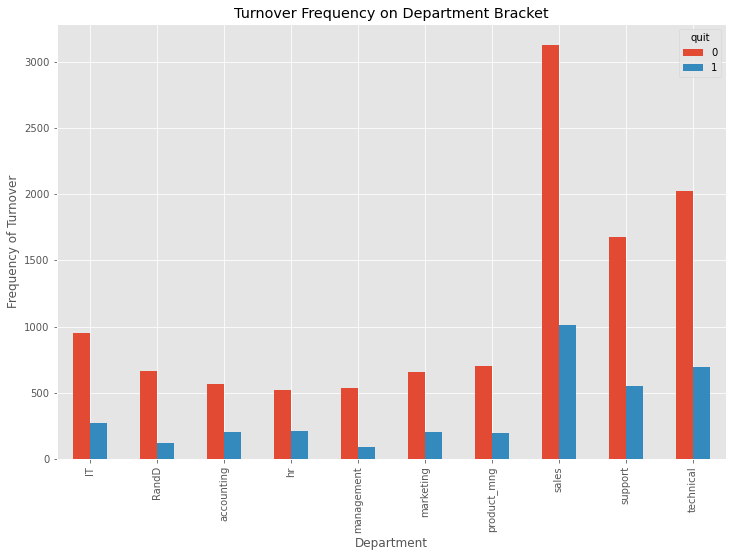

In [11]:
pd.crosstab(employee.department, employee.quit).plot(kind = 'bar')
plt.title('Turnover Frequency on Department Bracket')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

In [12]:
cat_vars = ['department', 'salary']
for var in cat_vars:
    cat_list = pd.get_dummies(employee[var], prefix = var)
    employee = employee.join(cat_list)

In [13]:
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [14]:
employee.drop(columns = ["department", "salary"], axis = 1, inplace = True)


In [15]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4. Visualize Class Imbalance

In [16]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

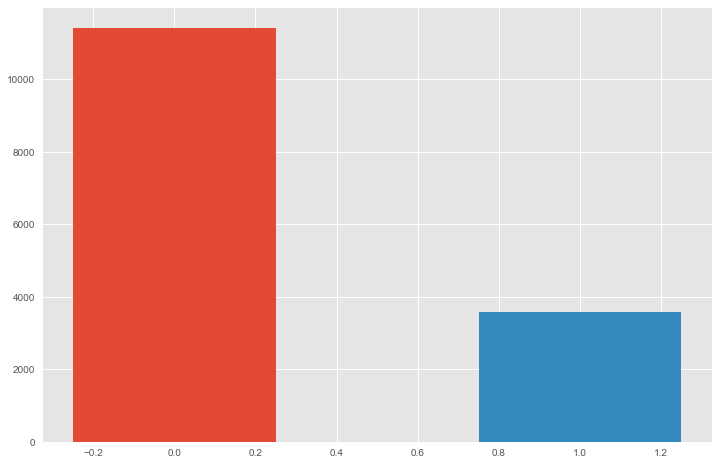

In [17]:
visualizer = ClassBalance(labels = ["stayed", "quit"]).fit(employee.quit)

## 5. Create Training and Test Sets

In [31]:
X = employee.loc[:,employee.columns != 'quit']
y = employee.quit

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)


## 6. Build an interactive Decision Tree Classifier

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [38]:
@interact 
def plot_tree(crit= ['gini','entropy'],
              split= ['best','random'],
              depth=IntSlider(min = 1,max = 30,value = 2, continuous_update=False),
              min_split=IntSlider(min = 2,max = 5,value = 2, continuous_update=False),
              min_leaf=IntSlider(min= 1,max = 5,value = 1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state = 0,
                                       criterion = crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split = min_split,
                                       min_samples_leaf = min_leaf)
    estimator.fit(X_train, y_train) 
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator,out_file = None, 
                                        feature_names = X_train.columns,
                                        class_names = ['stayed', 'quit'],
                                        filled = True))
    
    display(Image(data = graph.pipe(format = 'png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## 7.  Build an Interactive Random Forest Classifier


 Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [39]:
@interact
def plot_tree_rf(crit= ['gini','entropy'],
                 bootstrap= ['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state = 1,
                                       criterion = crit,
                                       bootstrap = bootstrap,
                                       n_estimators = forests,
                                       max_depth = depth,
                                       min_samples_split = min_split,
                                       min_samples_leaf = min_leaf,
                                       n_jobs=-1,
                                       verbose = False)
    
    estimator.fit(X_train, y_train)
    
    print('Random Forests Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forests Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\Visualizing Tree:', 0)
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file = None, 
                                        feature_names = X_train.columns,
                                        class_names = ['stayed', 'quit'],
                                        filled = True))
    
    display(Image(data = graph.pipe(format = 'png')))
    return estimator
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## 8. Feature Importance and Evaluation Metrics


In [28]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

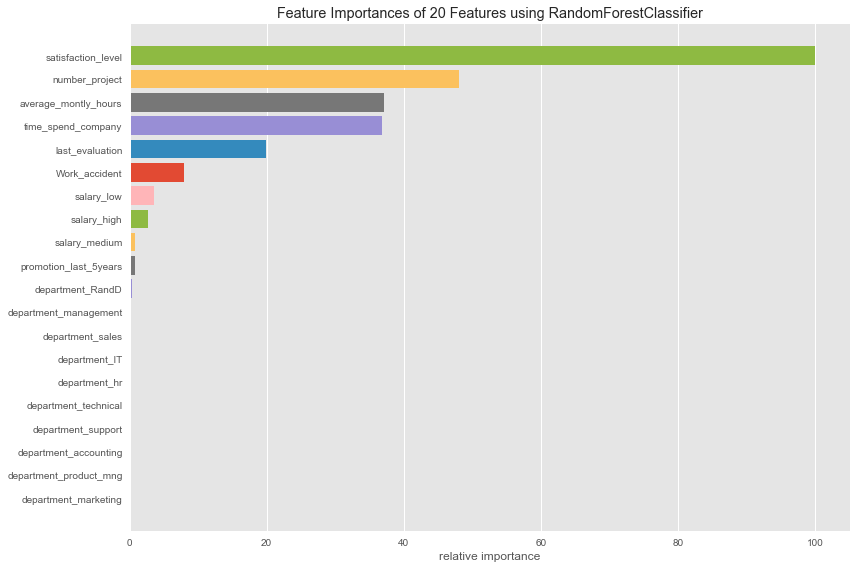

In [40]:
rf = RandomForestClassifier(bootstrap='True', max_depth=3, n_jobs=-1, random_state=1,
                       verbose=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

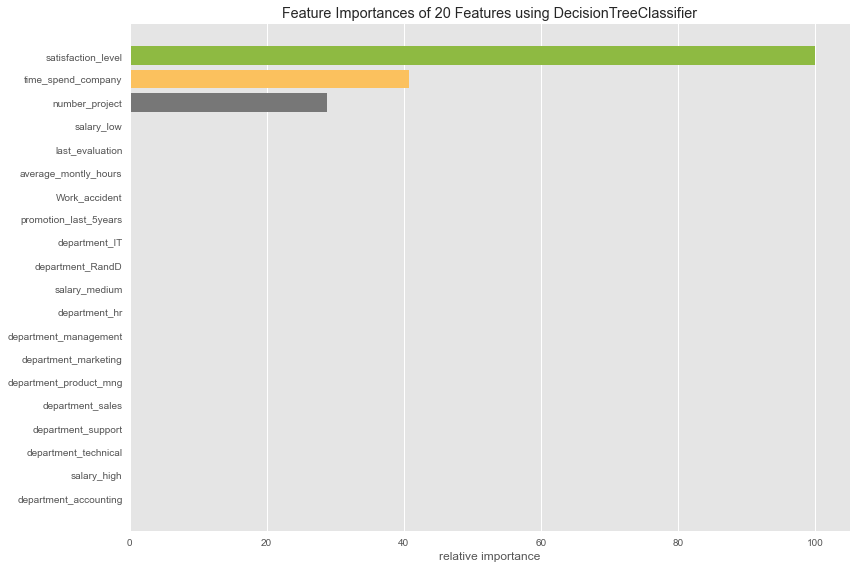

In [41]:
dt = DecisionTreeClassifier(max_depth=2, random_state=0)

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show();

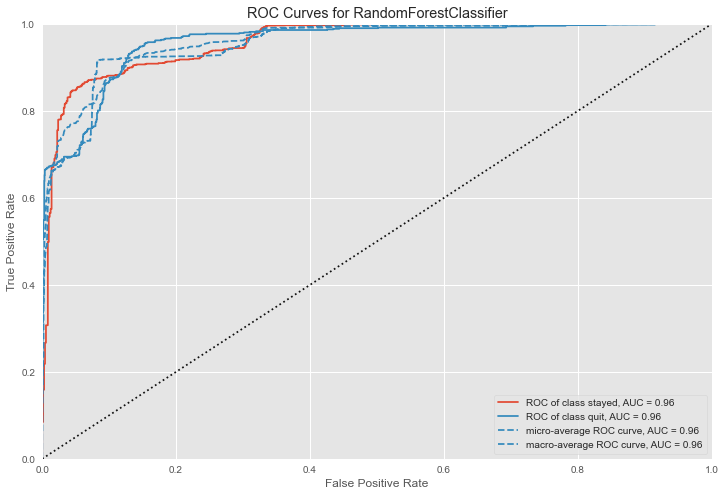

In [43]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes = ['stayed', 'quit'])
 
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

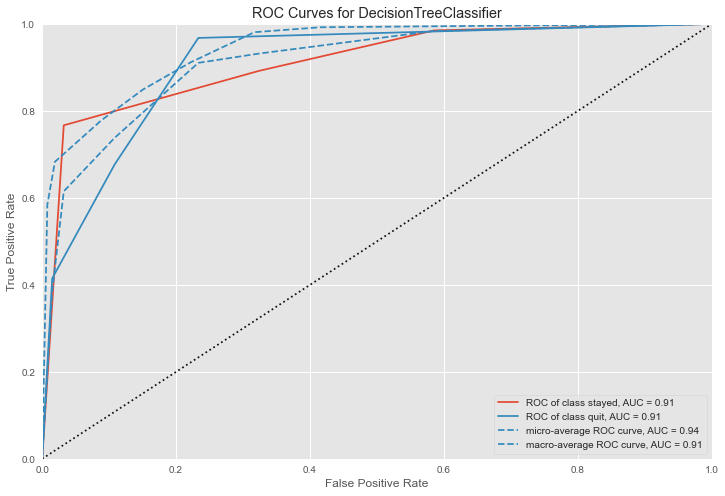

In [44]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(dt, classes = ['stayed', 'quit'])
 
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();